In [1]:
ls

'Ayeduase gate.csv'*                  Oti_Landfill.ipynb
 environmental_data_time_series.png   pie_oti.png
 heatmap_oti.png                      pie.png
 heatmap.png                          pm_landfill.png
 oti_environ_variables.png            pm_with_annotations.png
 Oti_Landfill.csv*                   'THe Atmos defenders.ipynb'


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [4]:
a = pd.read_csv("Ayeduase gate.csv")
a

,Date,"VOC, ppm",AQS,"Temperature, °C","Humidity, %","Pressure, mbar","PM1, ug/m3","PM2.5, ug/m3","PM10, ug/m3",Latitude,Longitude
0,11/13/2024 15:48,0.302,81,28.2,43,978.30,10.4,13.1,14.2,6.683081,-1.568235
1,11/13/2024 15:47,0.302,81,28.0,41,978.25,10.0,12.0,14.0,6.683047,-1.568237
2,11/13/2024 15:46,0.471,71,28.0,42,978.15,9.0,11.0,13.0,6.683078,-1.568236
3,11/13/2024 15:45,0.480,71,28.0,43,978.15,9.0,11.0,13.0,6.683078,-1.568236
4,11/13/2024 15:44,0.490,70,28.0,42,978.15,8.0,11.0,12.0,6.683078,-1.568236
...,...,...,...,...,...,...,...,...,...,...,...
157,11/13/2024 13:11,0.014,78,34.0,52,977.99,16.0,18.0,19.0,NaN,NaN
158,11/13/2024 13:10,0.010,78,34.0,46,978.04,16.0,19.0,20.0,NaN,NaN
159,11/13/2024 13:09,0.010,81,34.0,49,978.05,13.0,15.0,16.0,NaN,NaN
160,11/13/2024 13:08,NaN,79,34.0,48,978.03,14.0,18.0,21.0,NaN,NaN


In [5]:
b=a['Date'] = pd.to_datetime(a['Date'], errors='coerce')
time = b.dt.strftime('%H:%M')
c=a['VOC, ppm']
d=a['PM1, ug/m3']
e=a['PM2.5, ug/m3']
f=a['PM10, ug/m3']
g=a['AQS']
h=a['Humidity, %']
i=a['Temperature, °C']

In [9]:
time

0      15:48
1      15:47
2      15:46
3      15:45
4      15:44
       ...  
157    13:11
158    13:10
159    13:09
160    13:08
161    13:07
Name: Date, Length: 162, dtype: object

Correlation between PM 1.0 and PM 2.5: 0.99
Correlation between PM 1.0 and PM 10: 0.98
Correlation between PM 2.5 and PM 10: 0.99
Correlation between PM 1.0 and AQS: -0.14


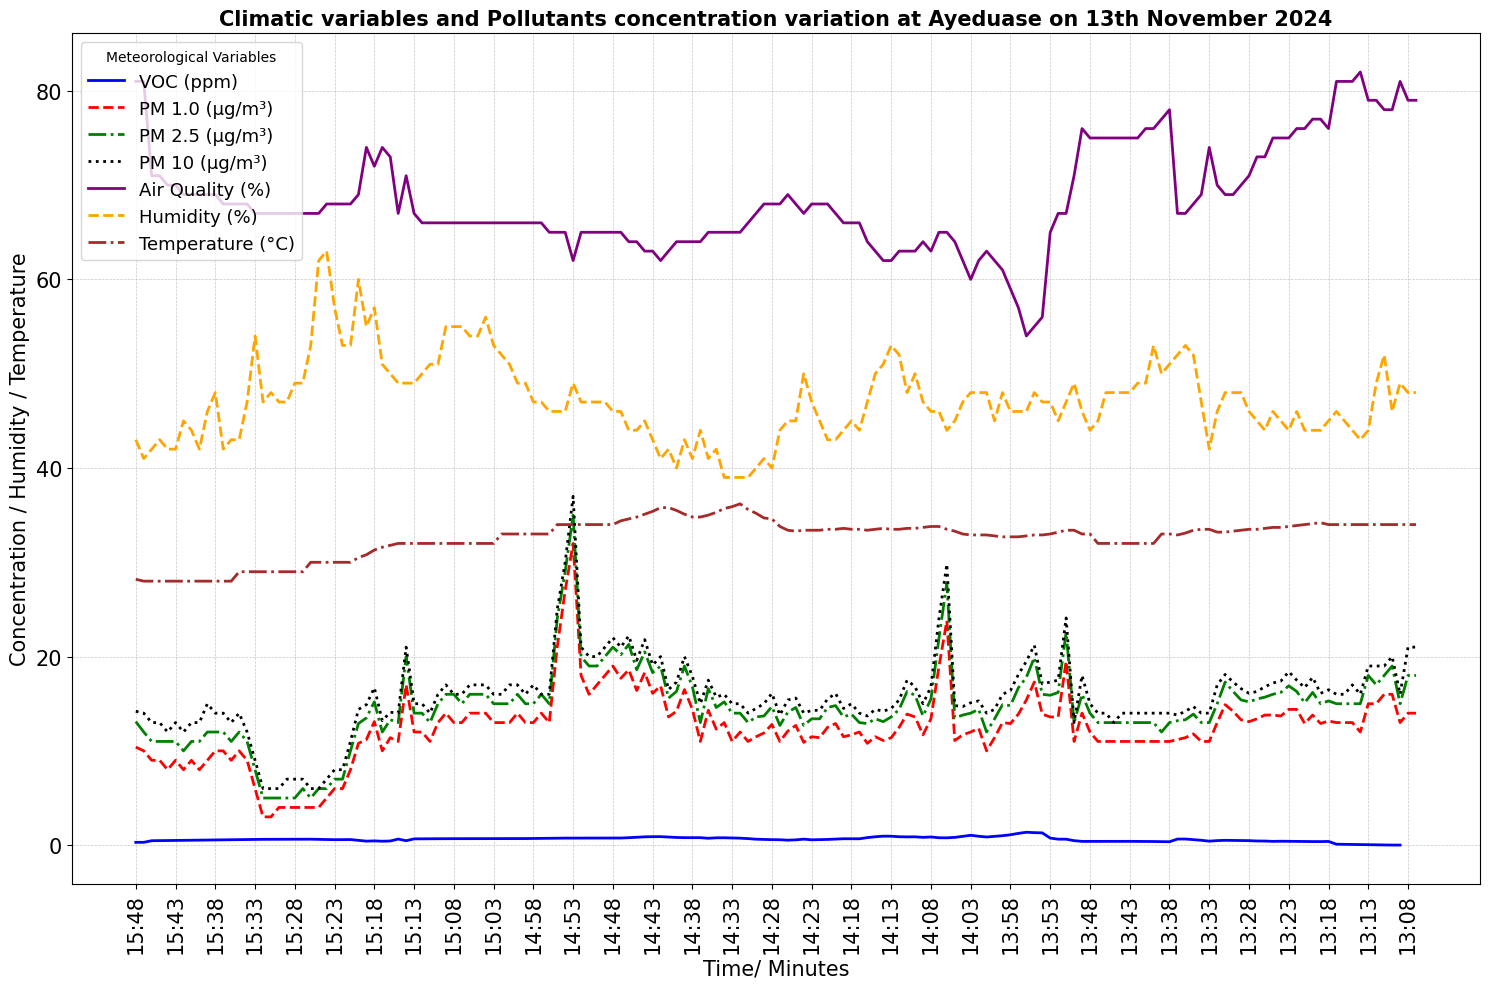

In [27]:
# Calculate correlations between different variables
corr_de = np.corrcoef(d, e)[0, 1] 
corr_df = np.corrcoef(d, f)[0, 1] 
corr_ef = np.corrcoef(e, f)[0, 1] 
corr_dg = np.corrcoef(d, g)[0, 1]
print(f"Correlation between PM 1.0 and PM 2.5: {corr_de:.2f}")
print(f"Correlation between PM 1.0 and PM 10: {corr_df:.2f}")
print(f"Correlation between PM 2.5 and PM 10: {corr_ef:.2f}")
print(f"Correlation between PM 1.0 and AQS: {corr_dg:.2f}")

# Create the plot
plt.figure(figsize=(15, 10))

plt.plot(time, c, label='VOC (ppm)', color='b', linewidth=2, linestyle='-')
plt.plot(time, d, label='PM 1.0 (µg/m³)', color='r', linewidth=2, linestyle='--')
plt.plot(time, e, label='PM 2.5 (µg/m³)', color='g', linewidth=2, linestyle='-.')
plt.plot(time, f, label='PM 10 (µg/m³)', color='black', linewidth=2, linestyle=':')
plt.plot(time, g, label='Air Quality (%)', color='purple', linewidth=2, linestyle='-')
plt.plot(time, h, label='Humidity (%)', color='orange', linewidth=2, linestyle='--')
plt.plot(time, i, label='Temperature (°C)', color='brown', linewidth=2, linestyle='-.')

# Title and labels
plt.title("Climatic variables and Pollutants concentration variation at Ayeduase on 13th November 2024", fontsize=15, fontweight='bold')
plt.xlabel("Time/ Minutes", fontsize=15)
plt.ylabel("Concentration / Humidity / Temperature", fontsize=15)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title='Meteorological Variables', loc='upper left', fontsize=13)
plt.yticks(fontsize=15)
plt.xticks(rotation=90,fontsize=15)
interval = 5  
plt.xticks(range(0, len(time), interval), time[::interval])
plt.tight_layout()
plt.savefig("environmental_data_time_series.png", dpi=500)
plt.show()

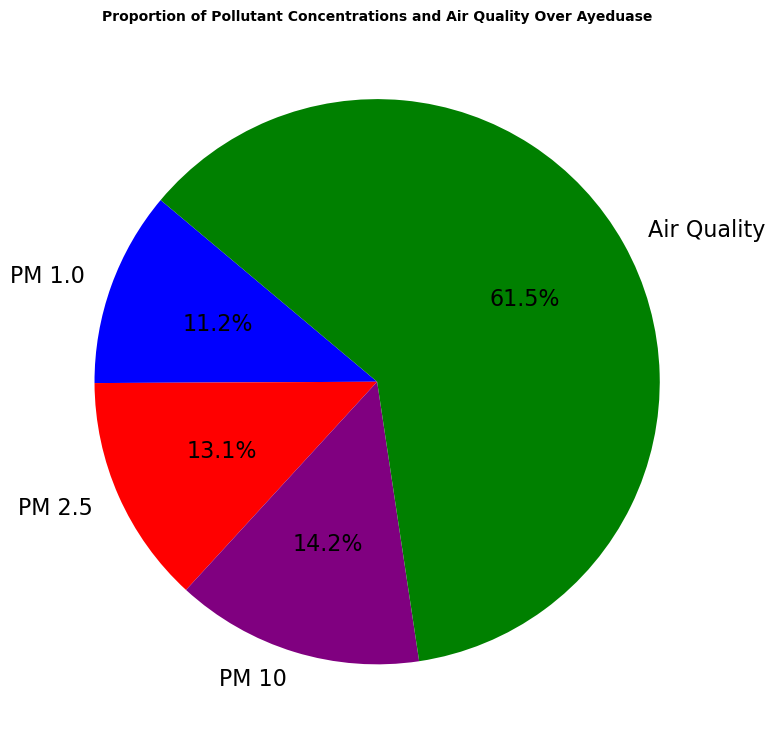

In [49]:
total_pm_1_0 = np.sum(d)
total_pm_2_5 = np.sum(e)
total_pm_10 = np.sum(f)
total_aqs = np.sum(g)

total_concentrations = [total_pm_1_0, total_pm_2_5, total_pm_10, total_aqs]

pollutant_labels = ['PM 1.0', 'PM 2.5', 'PM 10', 'Air Quality']
plt.figure(figsize=(8, 8))
plt.pie(total_concentrations, labels=pollutant_labels, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16}, colors=['blue', 'red', 'purple','green'])
plt.title("Proportion of Pollutant Concentrations and Air Quality Over Ayeduase", fontsize=10, fontweight='bold')


plt.tight_layout()
plt.savefig('pie.png',dpi=500)
plt.show()


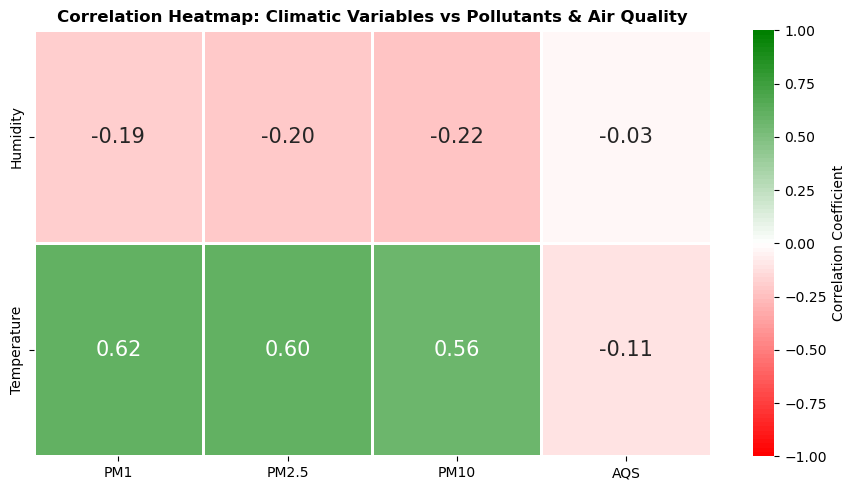

In [83]:
corr_hd = np.corrcoef(h, d)[0, 1]  # Humidity vs PM 1.0
corr_he = np.corrcoef(h, e)[0, 1]  # Humidity vs PM 2.5
corr_hf = np.corrcoef(h, f)[0, 1]  
corr_hg = np.corrcoef(h, g)[0, 1]  

corr_id = np.corrcoef(i, d)[0, 1] 
corr_ie = np.corrcoef(i, e)[0, 1] 
corr_if = np.corrcoef(i, f)[0, 1]  
corr_ig = np.corrcoef(i, g)[0, 1]  

corr_matrix_climatic = np.array([[corr_hd, corr_he, corr_hf, corr_hg],
                                 [corr_id, corr_ie, corr_if, corr_ig]])

corr_df_climatic = pd.DataFrame(corr_matrix_climatic,
                                columns=['PM1', 'PM2.5', 'PM10', 'AQS'],
                                index=['Humidity', 'Temperature'])

colors = ["red", "white", "green"]  
n_bins = 100  
cmap_name = 'green_white_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(9, 5))
sns.heatmap(corr_df_climatic, annot=True, cmap=cm, vmin=-1, vmax=1, fmt=".2f", linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'size': 15})
plt.title("Correlation Heatmap: Climatic Variables vs Pollutants & Air Quality", fontsize=12, fontweight='bold')
plt.tight_layout()

plt.savefig('heatmap.png',dpi=500)
plt.show()
